# World Happiness Report


The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

### Dystopia
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width.

### Residuals

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 



# Importing libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statistics as stat
import math
import warnings
warnings.filterwarnings("ignore")

# Importing dataset

In [7]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')

In [8]:
df.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


In [9]:
# checking columns
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [10]:
# checking shape of the dataset
df.shape

(158, 12)

In [11]:
# Understanding each column datatype and null values if any 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [12]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

# EDA

## Distplot

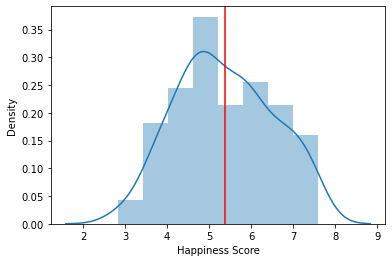

In [13]:
# Checking data distribution for happiness score
sns.distplot(x=df['Happiness Score'])
plt.axvline(np.mean(df['Happiness Score']),color='red')
plt.xlabel('Happiness Score')
plt.ylabel('Density')
plt.show()

The average Happiness score lies between 5 and 6

In [14]:
# To check How data is duistributed for each column

dist_df = df.drop(columns=['Country','Region'])
dist_df

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


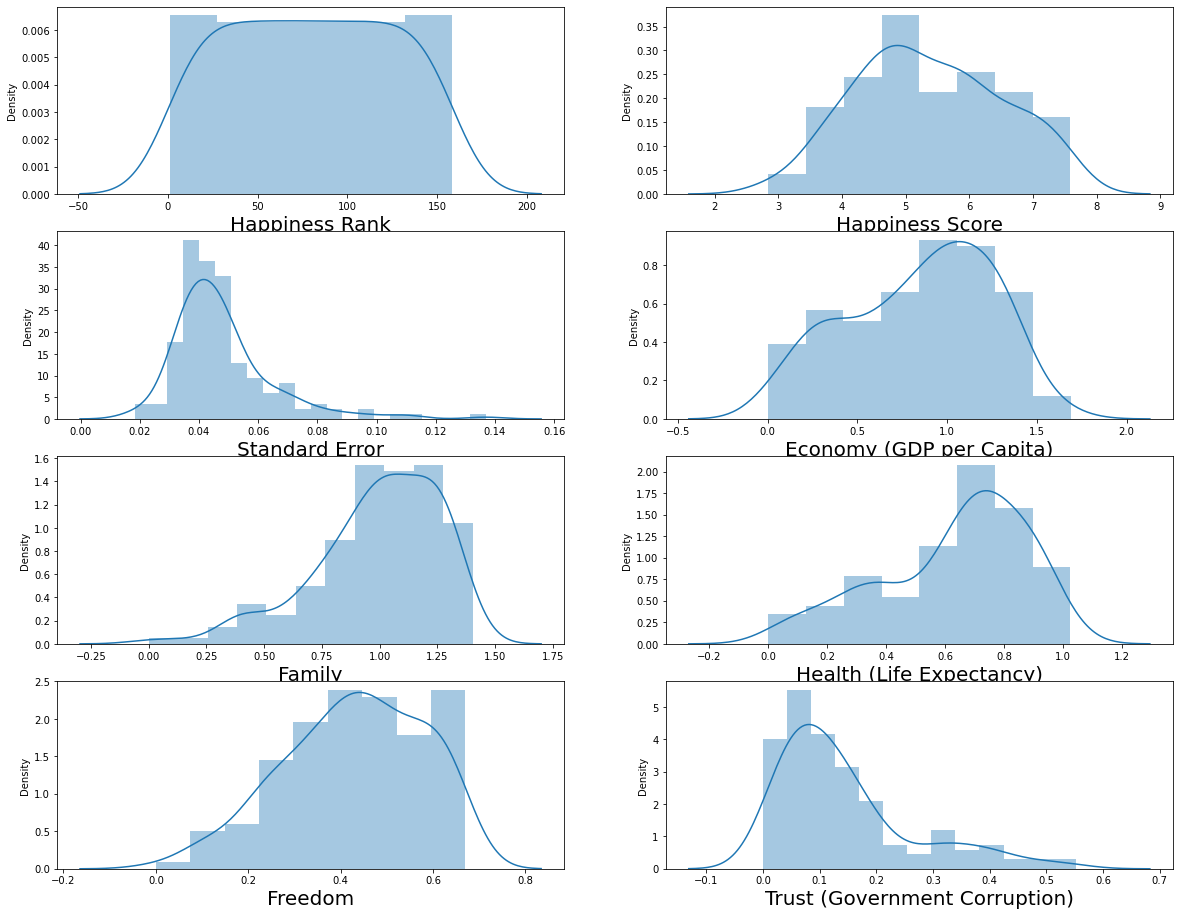

In [15]:
# Checking distribution for each column
plt.figure(figsize=(20,20), facecolor ='white')
pltnumber=1

for column in dist_df:
    if pltnumber<=8:
        ax = plt.subplot(5,2,pltnumber)
        sns.distplot(dist_df[column])
        plt.xlabel(column,fontsize=20)
    pltnumber +=1
plt.show()  #plt.show()

The skewness is observed for Trust ,Health, Family and standard error columns

# Handling Categorical data

In [16]:
    # Using label Encoder to convert data in country into numeric

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Country']=le.fit_transform(df['Country'])

In [17]:
print(df['Country'].unique)

<bound method Series.unique of 0      135
1       58
2       37
3      105
4       24
      ... 
153    118
154     13
155    136
156     21
157    141
Name: Country, Length: 158, dtype: int32>


In [18]:
# Using OneHotEncoder for region since it is a nominal categorical data

region = df['Region']
region = pd.get_dummies(region,drop_first=True)


In [32]:
# Joining the region and variable column

df_concat = pd.concat([df.region],axis=1)
df_concat

AttributeError: 'DataFrame' object has no attribute 'region'

In [33]:
# removing region column from the dataset

df_concat.drop(['Region'],axis=1,inplace=True)


In [34]:
df_concat

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,135,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0,0,0,0,0,0,0,0,1
1,58,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0,0,0,0,0,0,0,0,1
2,37,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0,0,0,0,0,0,0,0,1
3,105,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0,0,0,0,0,0,0,0,1
4,24,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,0,0,0,0,0,0,0,1,0
154,13,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,0,0,0,0,0,0,0,1,0
155,136,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,0,0,0,1,0,0,0,0,0
156,21,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,0,0,0,0,0,0,0,1,0


In [35]:
# Checking the statistics of the data
df_concat.describe()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,0.183544,0.037975,0.139241,0.126582,0.012658,0.056962,0.044304,0.253165,0.132911
std,45.754781,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550,0.388343,0.191743,0.347298,0.333562,0.112150,0.232507,0.206423,0.436207,0.340558
min,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.250000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,78.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,117.750000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000
max,157.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Correlation

In [36]:
corr=df_concat

In [37]:
corr

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,135,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0,0,0,0,0,0,0,0,1
1,58,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0,0,0,0,0,0,0,0,1
2,37,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0,0,0,0,0,0,0,0,1
3,105,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0,0,0,0,0,0,0,0,1
4,24,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,0,0,0,0,0,0,0,1,0
154,13,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,0,0,0,0,0,0,0,1,0
155,136,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,0,0,0,1,0,0,0,0,0
156,21,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,0,0,0,0,0,0,0,1,0


In [38]:
# Splitting the dataset into features and label

df_feature=corr.drop("Happiness Score",axis=1)
df_label=df['Happiness Score']

In [39]:
df_feature.head(2)

,Country,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,135,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0,0,0,0,0,0,0,0,1
1,58,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0,0,0,0,0,0,0,0,1


In [40]:
df_label.head(2)

0    7.587
1    7.561
Name: Happiness Score, dtype: float64

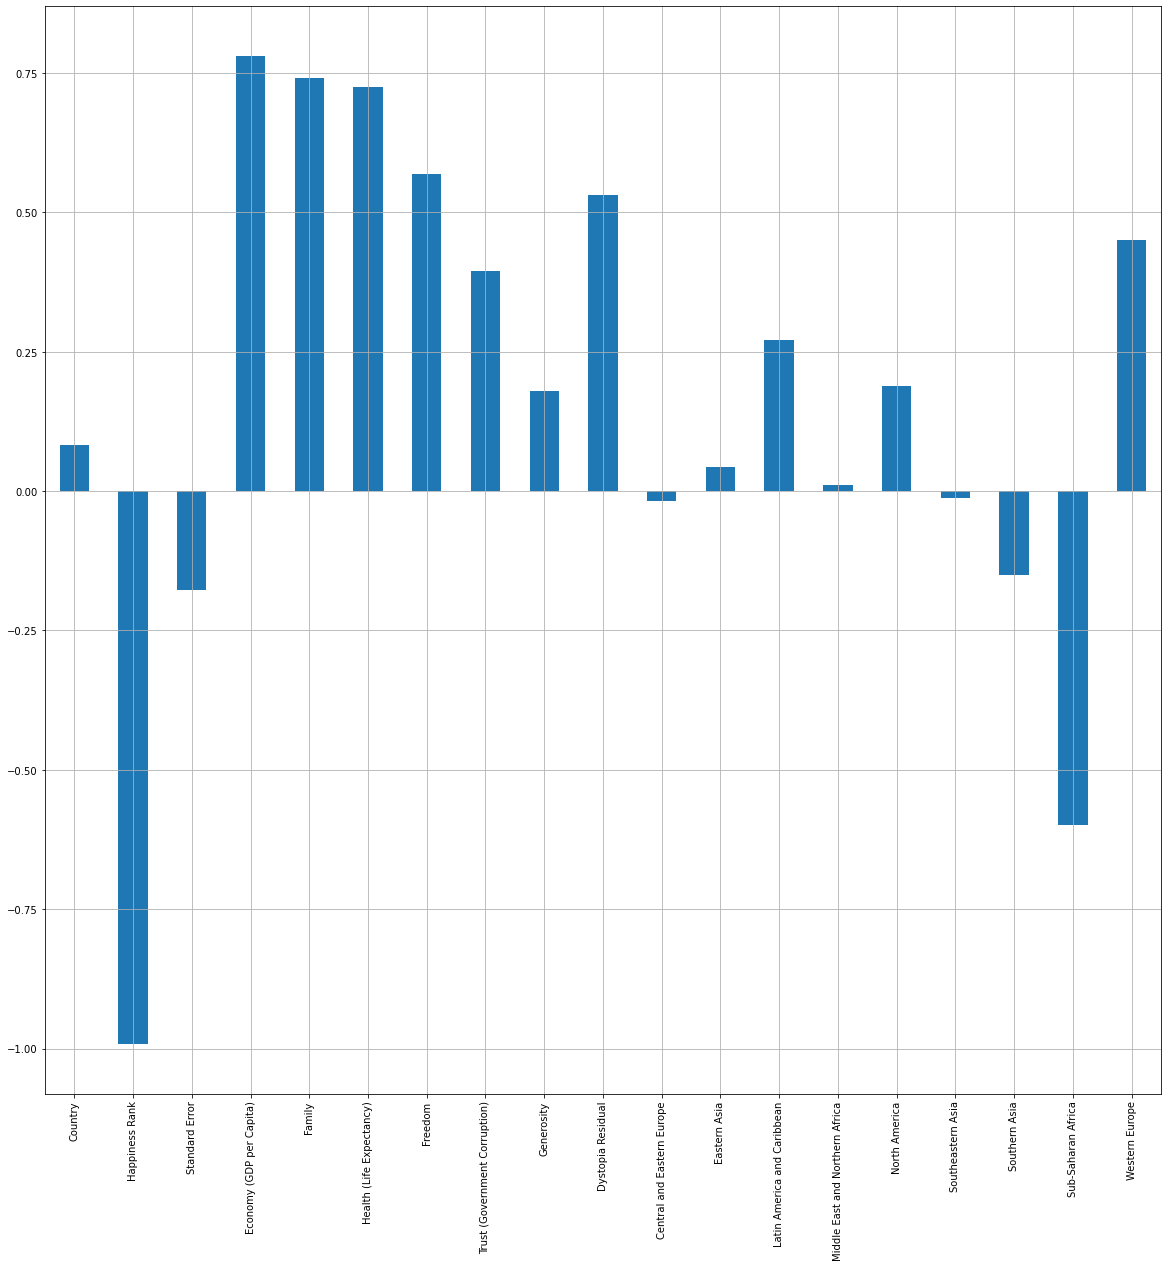

In [41]:
plt.figure(figsize=(20,20))
df_feature.corrwith(df_label).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.show()

# Outliers

<AxesSubplot:>

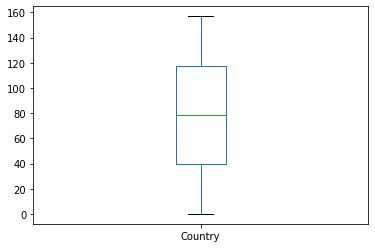

In [28]:
df_feature['Country'].plot(kind='box')

<AxesSubplot:>

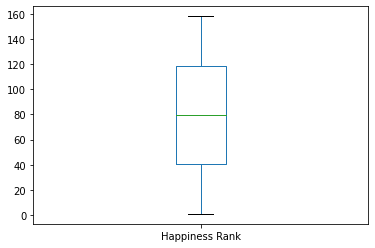

In [29]:
df_feature['Happiness Rank'].plot(kind='box')

<AxesSubplot:>

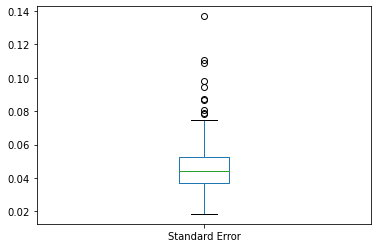

In [53]:
df_feature['Standard Error'].plot(kind='box')

<AxesSubplot:>

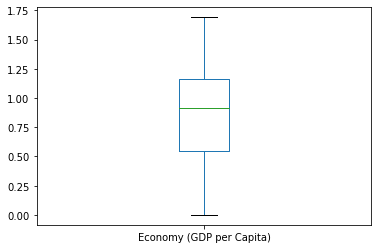

In [54]:
df_feature['Economy (GDP per Capita)'].plot(kind='box')

<AxesSubplot:>

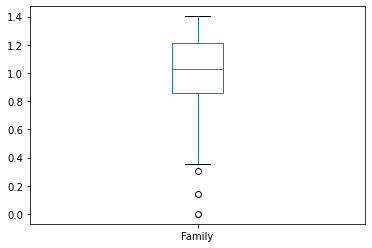

In [55]:
df_feature['Family'].plot(kind='box')

<AxesSubplot:>

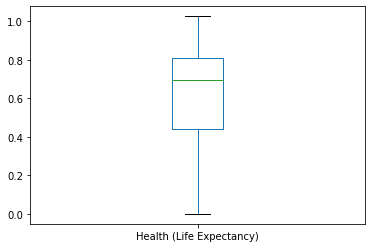

In [56]:
df_feature['Health (Life Expectancy)'].plot(kind='box')

<AxesSubplot:>

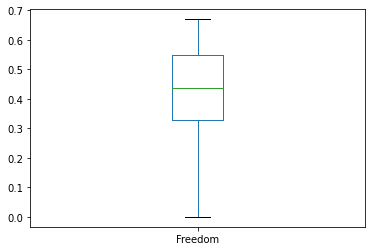

In [57]:
df_feature['Freedom'].plot(kind='box')

<AxesSubplot:>

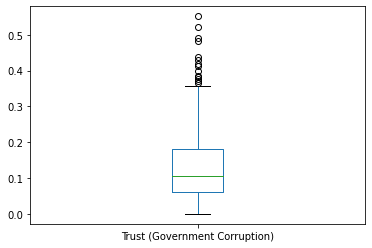

In [58]:
df_feature['Trust (Government Corruption)'].plot(kind='box')

<AxesSubplot:>

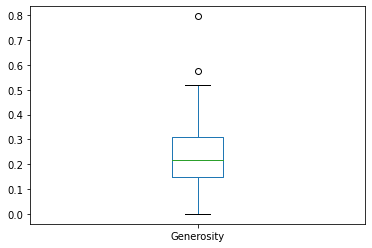

In [59]:
df_feature['Generosity'].plot(kind='box')

<AxesSubplot:>

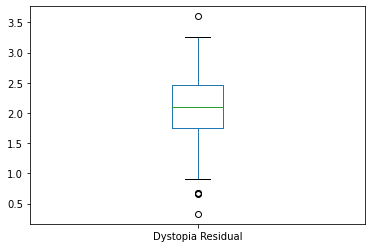

In [60]:
df_feature['Dystopia Residual'].plot(kind='box')

# Removing outliers using z score 

In [42]:
from scipy.stats import zscore

In [43]:
z=np.abs(zscore(corr))
z

array([[1.23877001, 1.72099989, 1.93736005, ..., 0.21530819, 0.58222251,
        2.55417492],
       [0.44946522, 1.69907456, 1.91458063, ..., 0.21530819, 0.58222251,
        2.55417492],
       [0.90989302, 1.67714922, 1.88479215, ..., 0.21530819, 0.58222251,
        2.55417492],
       ...,
       [1.26069514, 1.67742676, 2.0761992 , ..., 0.21530819, 0.58222251,
        0.39151586],
       [1.26069514, 1.69935209, 2.1646885 , ..., 0.21530819, 1.7175564 ,
        0.39151586],
       [1.37032081, 1.72127743, 2.22251319, ..., 0.21530819, 1.7175564 ,
        0.39151586]])

In [44]:
print(np.where(z>3))

(array([  4,  14,  23,  27,  33,  37,  40,  45,  46,  60,  64,  71,  73,
        74,  78,  80,  83,  89,  98,  99, 108, 115, 116, 120, 128, 128,
       131, 144, 147, 152, 153, 155, 157], dtype=int64), array([15, 15, 16,  8, 16, 12,  3, 12, 12, 16,  3, 12, 16, 16, 17, 17, 12,
       16, 16, 12, 17,  3, 17, 17,  9, 16, 17, 16,  5, 17,  8, 10,  5],
      dtype=int64))


In [45]:
df_z1 =corr[(z<3).all(axis=1)]
df_z1

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,135,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,0,0,0,0,0,0,0,0,1
1,58,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,0,0,0,0,0,0,0,0,1
2,37,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,0,0,0,0,0,0,0,0,1
3,105,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,0,0,0,0,0,0,0,0,1
5,45,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,53,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172,0,0,0,0,0,0,0,1,0
150,66,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723,0,0,0,0,0,0,0,1,0
151,20,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494,0,0,0,0,0,0,0,1,0
154,13,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,0,0,0,0,0,0,0,1,0


In [46]:
print(df_z1 .shape)
print(corr.shape)

(126, 20)
(158, 20)


# Percentage loss

In [47]:
p_loss= (158-126)/158*100
p_loss

20.253164556962027

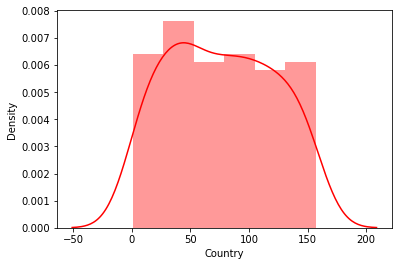

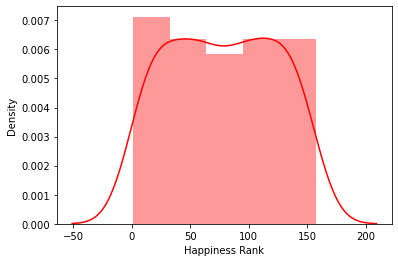

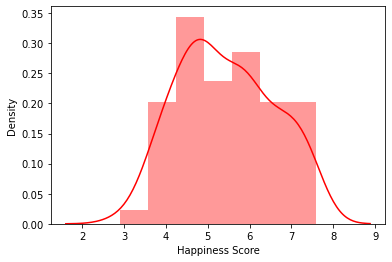

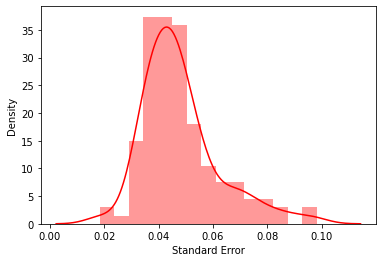

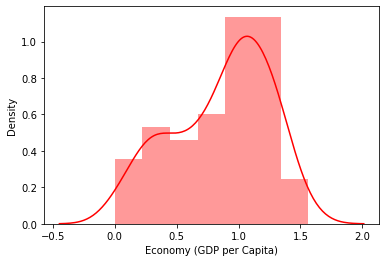

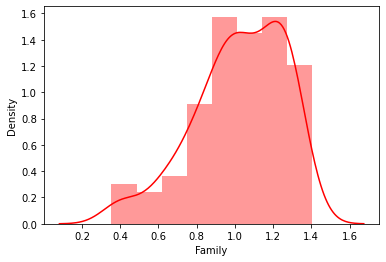

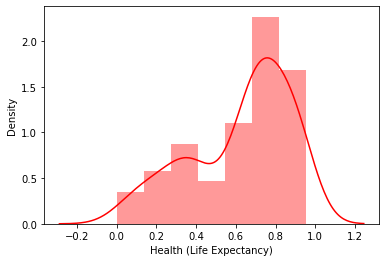

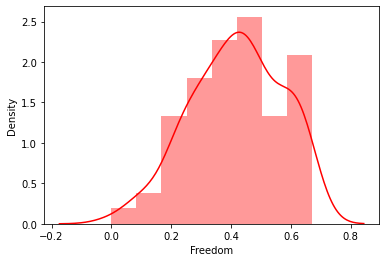

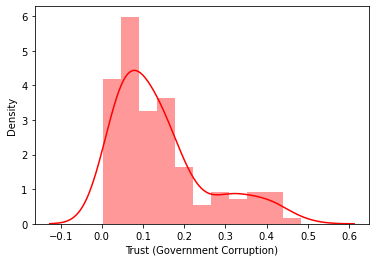

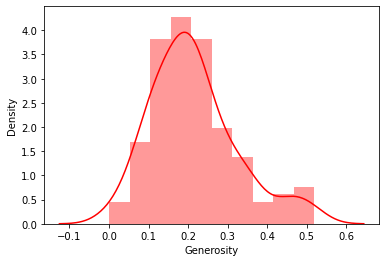

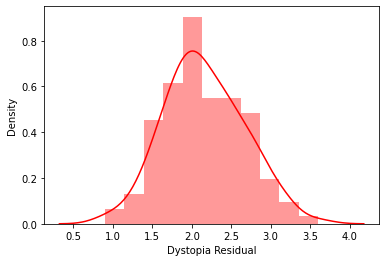

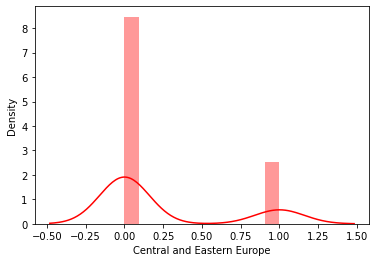

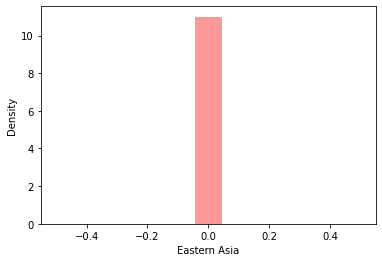

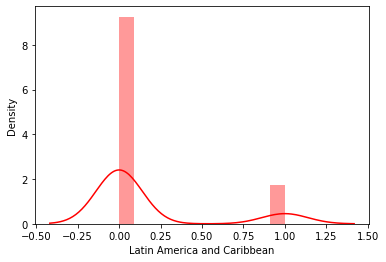

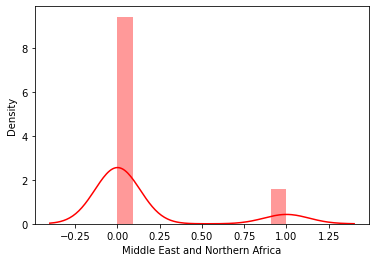

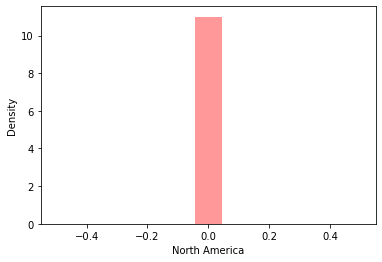

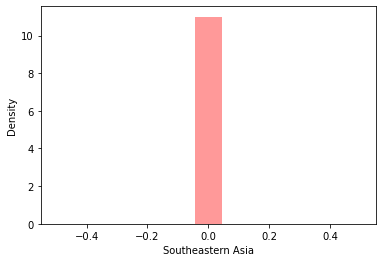

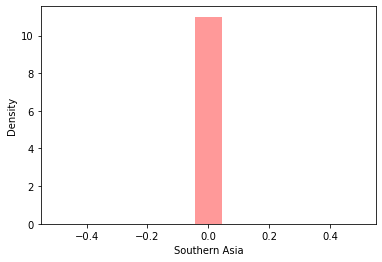

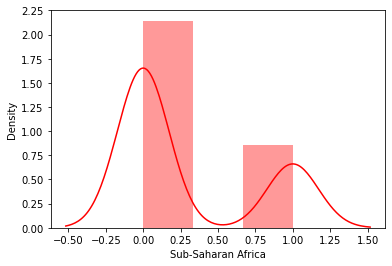

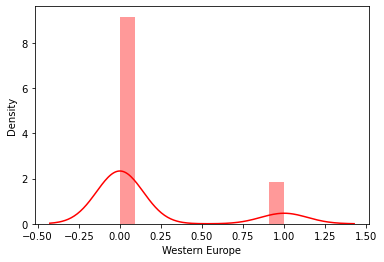

In [48]:
for column in df_z1.describe().columns:
    sns.distplot(df_z1[column],color='r')
    plt.show()

In [68]:
# removing skewness from the features using sqrt and cbrt method

df_z1.skew()
for col in df_z1.skew().index:
    if col in df_z1.describe().columns:
        if df_z1[col].skew()>0.5:
            df_z1[col]=np.sqrt(df_z1[col])
        if df_z1[col].skew()<0.5:
            df_z1[col]=np.cbrt(df_z1[col])

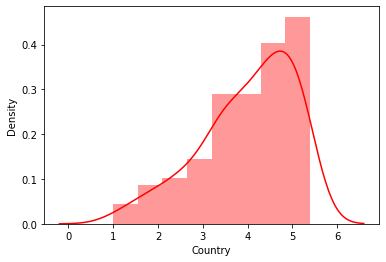

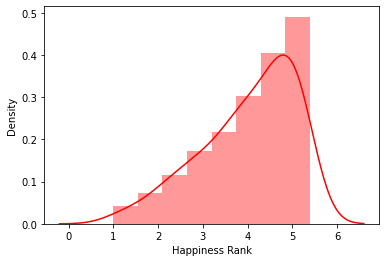

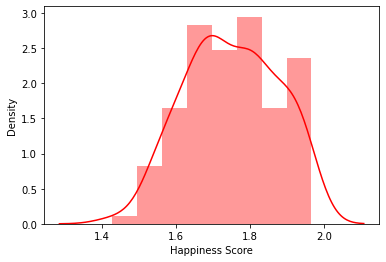

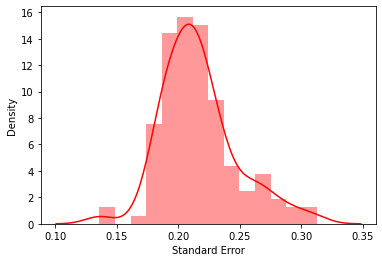

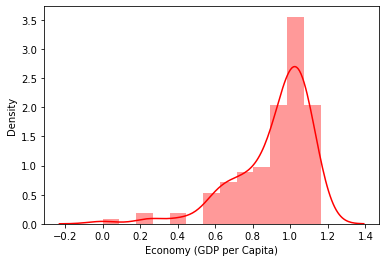

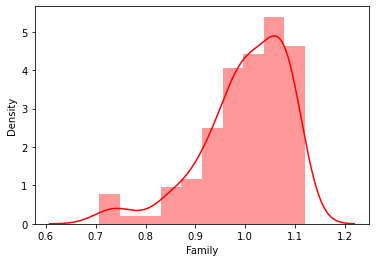

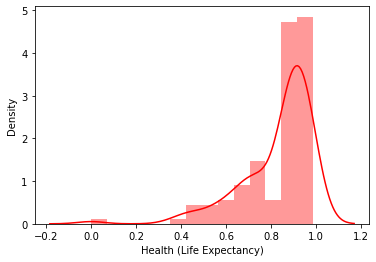

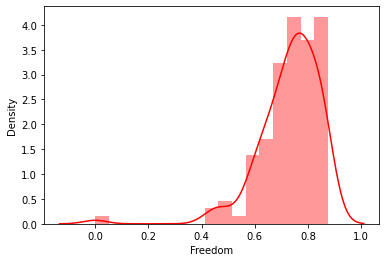

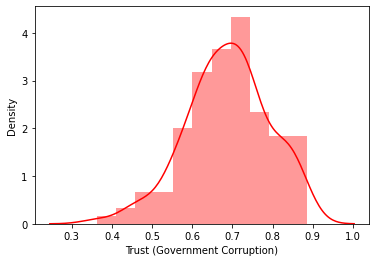

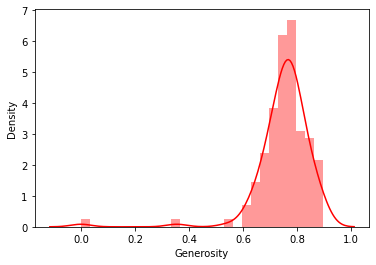

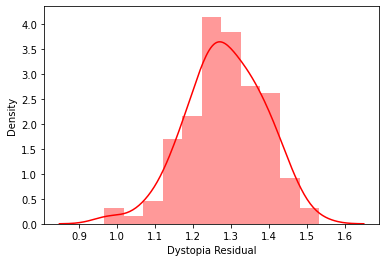

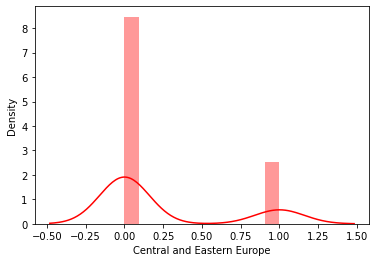

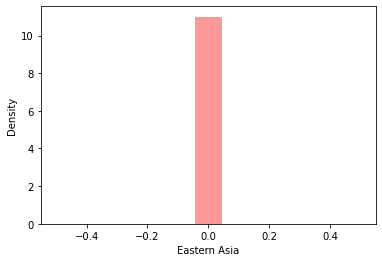

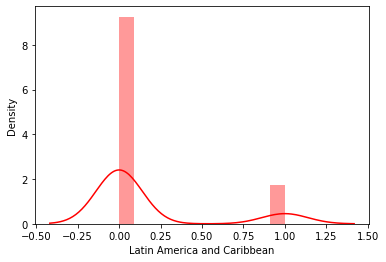

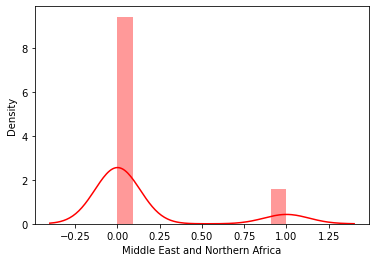

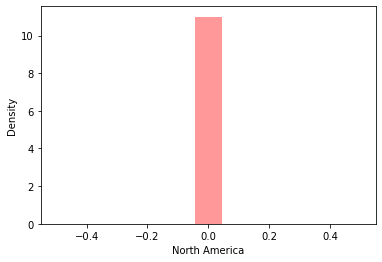

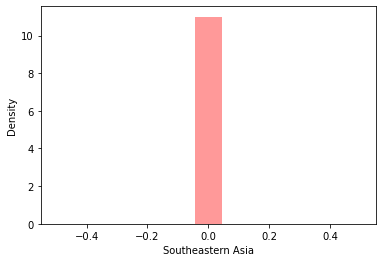

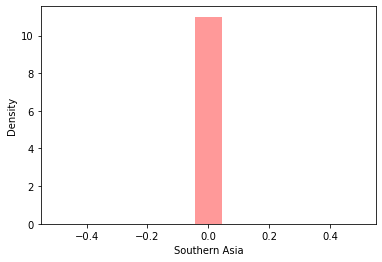

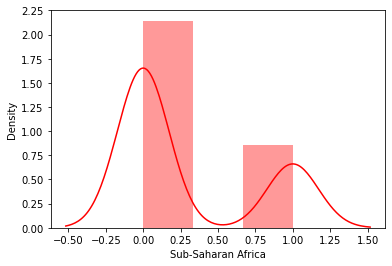

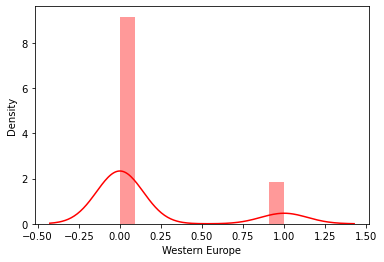

In [102]:
for column in df_z1.describe().columns:
    sns.distplot(df_z1[column],color='r')
    plt.show()

# Feature selection


In [69]:
x=df_z1.drop(columns=['Happiness Score'],axis=1)
y=df_z1['Happiness Score']


In [70]:
# Scaling the data using standard scalar
x=StandardScaler().fit_transform(x)
print(x)

[[ 1.07923583 -2.87088037 -1.03816472 ...  0.         -0.63245553
   2.23606798]
 [-0.12332696 -2.62393624  0.14519303 ...  0.         -0.63245553
   2.23606798]
 [-0.63781454 -2.45071072 -1.11184948 ...  0.         -0.63245553
   2.23606798]
 ...
 [-1.22790046  1.24940204 -0.28030298 ...  0.          1.58113883
  -0.4472136 ]
 [-1.57469336  1.28254256 -0.82574107 ...  0.          1.58113883
  -0.4472136 ]
 [-1.18539073  1.30439935  2.53242286 ...  0.          1.58113883
  -0.4472136 ]]


# Building ML Model 

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=256)

In [72]:
x_train

array([[-0.95513097, -0.97073313,  0.7916174 , ...,  0.        ,
        -0.63245553, -0.4472136 ],
       [ 0.94236808, -0.44164349, -0.32512015, ...,  0.        ,
        -0.63245553, -0.4472136 ],
       [ 0.34582923,  0.48350171,  0.4992763 , ...,  0.        ,
        -0.63245553, -0.4472136 ],
       ...,
       [-1.83377433, -0.34434417,  0.52453562, ...,  0.        ,
        -0.63245553, -0.4472136 ],
       [ 1.19734775,  0.09457045, -0.39809289, ...,  0.        ,
        -0.63245553, -0.4472136 ],
       [ 0.17129616, -0.59905346, -0.17763666, ...,  0.        ,
        -0.63245553, -0.4472136 ]])

In [73]:
print(x_train.shape)

(94, 19)


In [74]:
print(x_test.shape)

(32, 19)


# Finding the best model


In [75]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lg=lr.predict(x_test)
r2score=r2_score(y_test,pred_lg)
cvsscore=cross_val_score(LinearRegression(),x_train,y_train,cv=2).mean()


In [76]:
print(r2score)
print(cvsscore)


0.9651089648815514
0.9317402822837723


In [79]:
# Lasso
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
ls=Lasso()
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
r2score=r2_score(y_test,pred_ls)
cvsscore=cross_val_score(Lasso(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

-0.2188555653572395
-0.10334269820610406
-0.11551286715113543


In [82]:
# Ridge
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
r2score=r2_score(y_test,pred_rd)
cvsscore=cross_val_score(Ridge(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

0.966916039952973
0.9601371921811742
0.006778847771798824


In [83]:
# ElasticNet
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
en=ElasticNet()
en.fit(x_train,y_train)
pred_en=en.predict(x_test)
r2score=r2_score(y_test,pred_en)
cvsscore=cross_val_score(ElasticNet(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

-0.2188555653572395
-0.10334269820610406
-0.11551286715113543


In [84]:
# AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
ar=AdaBoostRegressor()
ar.fit(x_train,y_train)
pred_ad=ar.predict(x_test)
r2score=r2_score(y_test,pred_ad)
cvsscore=cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

0.9964644938789408
0.9884599012333645
0.008004592645576292


In [85]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rg=RandomForestRegressor(n_estimators=88)
rg.fit(x_train,y_train)
pred_rg=rg.predict(x_test)
r2score=r2_score(y_test,pred_rg)
cvsscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=7).mean()
print(r2score)
print(cvsscore)
LR_diff=r2score-cvsscore
print(LR_diff)

0.9981016819518698
0.9905590059915094
0.007542675960360401


# Ridge gives the best score of R2 as well as cross validation score

# Score as 0.96 

# Saving the file

In [120]:
import pickle
filename="World Happiness_report.pkl"
pickle.dump(rd,open(filename,"wb"))